In [37]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [38]:
import gzip
import pickle

X,y = pickle.load(gzip.open('flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [40]:
NAME = "model".format(int(time.time()))
print(NAME)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=3e-4),
              metrics=["accuracy"])
model.summary()

model
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                247872    
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)         

In [41]:
loss = model.fit(X, y, epochs=10, validation_split=0.25)  

Epoch 1/10
235/235 [==============================] - 29s 125ms/step - loss: 1.4545 - accuracy: 0.3625 - val_loss: 1.3277 - val_accuracy: 0.4072
Epoch 2/10
235/235 [==============================] - 28s 121ms/step - loss: 1.3042 - accuracy: 0.4188 - val_loss: 1.2217 - val_accuracy: 0.4660
Epoch 3/10
235/235 [==============================] - 28s 120ms/step - loss: 1.2107 - accuracy: 0.4581 - val_loss: 1.1214 - val_accuracy: 0.5136
Epoch 4/10
235/235 [==============================] - 31s 133ms/step - loss: 1.0954 - accuracy: 0.5195 - val_loss: 1.0402 - val_accuracy: 0.5372
Epoch 5/10
235/235 [==============================] - 28s 118ms/step - loss: 1.0034 - accuracy: 0.5567 - val_loss: 0.9443 - val_accuracy: 0.5908
Epoch 6/10
235/235 [==============================] - 22s 92ms/step - loss: 0.8967 - accuracy: 0.6032 - val_loss: 0.8006 - val_accuracy: 0.6708
Epoch 7/10
235/235 [==============================] - 15s 62ms/step - loss: 0.8076 - accuracy: 0.6433 - val_loss: 0.7067 - val_accu

In [45]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 82.48%


<AxesSubplot:>

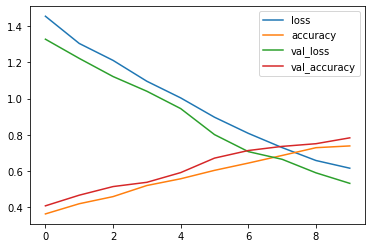

In [44]:
pd.DataFrame(loss.history).plot()

<AxesSubplot:>

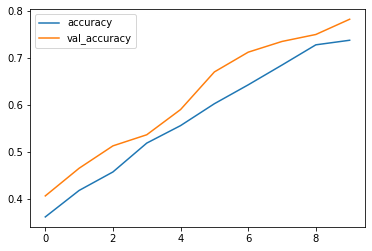

In [42]:
pd.DataFrame(loss.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

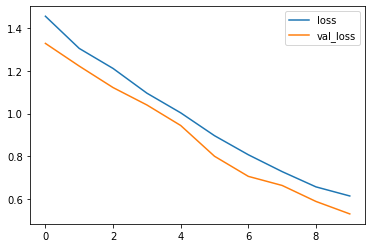

In [43]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [46]:
model.save('model.h5')